1. loading dataset and understanding
2. data understand and visualization

3. data preprocessing

4. model selection and training
5. Testing model and accuracy

6. saving model to a file
7. finally loading saved model and test on image




In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
drive_data_path = '/content/drive/My Drive/Data/'
# List the contents of the Data folder
print(os.listdir(drive_data_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Copy of resized train 19.zip', 'Copy of resized test 19.zip', 'train.csv']


In [ ]:
training_data_path = os.path.join(drive_data_path, 'Copy of resized train 19.zip')
print("training_data_path:-",training_data_path)

testing_data_path = os.path.join(drive_data_path, 'Copy of resized train 19.zip')
print("testing_data_path:-",training_data_path)

training_data_path:- /content/drive/My Drive/Data/Copy of resized train 19.zip
testing_data_path:- /content/drive/My Drive/Data/Copy of resized train 19.zip


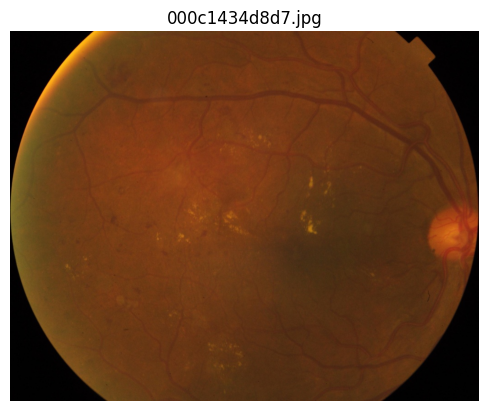

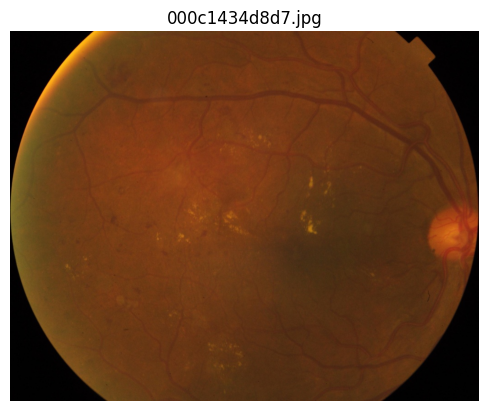

In [ ]:
#displaying data

import zipfile
from PIL import Image
import matplotlib.pyplot as plt

# Function to read and display images from a ZIP file
def read_images_from_zip(zip_path):
    with zipfile.ZipFile(zip_path) as zip_file:
        # Loop through files in the ZIP
        for file_name in zip_file.namelist():

            if file_name.endswith(('jpg', 'jpeg', 'png', 'gif')):  # Adjust as necessary for image formats
                with zip_file.open(file_name) as image_file:
                    image = Image.open(image_file)
                    plt.imshow(image)
                    plt.axis('off')
                    plt.title(file_name)
                    plt.show()
            break

# Read and display images from both ZIP files
read_images_from_zip(training_data_path)
read_images_from_zip(testing_data_path)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
data["diagnosis"].value_counts()

,count
diagnosis,
0,1805
2,999
1,370
4,295
3,193


In [ ]:

#important
import os
import pandas as pd
import zipfile
import shutil

# Paths (adjust these paths according to your setup)
zip_file_path = '/content/drive/MyDrive/Data/Copy of resized train 19.zip'  # Path to the ZIP file
csv_file_path = '/content/drive/MyDrive/Data/train.csv'  # Path to the CSV file
output_dir = 'Retina_Images'  # Path where the category folders will be created

# Step 1: Extract the images from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)  # Extract all images to the output directory

# Step 2: Load the CSV file
data = pd.read_csv(csv_file_path)

# Ensure the label column is string for compatibility with directory names
data['diagnosis'] = data['diagnosis'].astype(str)

# Step 3: Create category folders if they don't exist
categories = data['diagnosis'].unique()  # Get unique categories (labels)
for category in categories:
    category_path = os.path.join(output_dir, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)  # Create a folder for each category

# Step 4: Move images to their respective category folders
for _, row in data.iterrows():
    image_name = row['id_code'] + '.jpg'  # Assuming image files have .jpg extension
    label = row['diagnosis']

    # Source path (where images are extracted to) and target path (category folder)
    source_path = os.path.join(output_dir, image_name)
    target_path = os.path.join(output_dir, label, image_name)

    # Move the image to the respective category folder
    if os.path.exists(source_path):  # Check if the image exists
        shutil.move(source_path, target_path)
    else:
        print(f"Image {image_name} not found!")

print("Images have been sorted into category folders.")


Images have been sorted into category folders.


In [ ]:
!pip install -U imbalanced-learn

part1


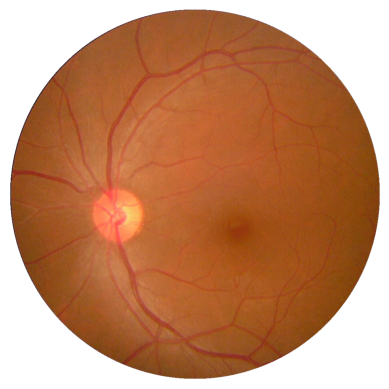

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/Retina_Images/0/002c21358ce6.jpg"  # Update with the path to your image file
image = cv2.imread(image_path)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
height, width = image.shape[:2]

# Create a circular mask with the same dimensions as the image
mask = np.zeros((height, width), dtype=np.uint8)
center = (width // 2, height // 2)
radius = min(center[0], center[1], width - center[0], height - center[1])

# Draw a filled circle on the mask
cv2.circle(mask, center, radius, 255, -1)

# Create an output image with an alpha channel (transparency)
output = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
output[:, :, 3] = mask  # Apply the circular mask to the alpha channel

# Display the result
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGRA2RGBA))  # Convert for displaying with matplotlib
plt.axis('off')
plt.show()


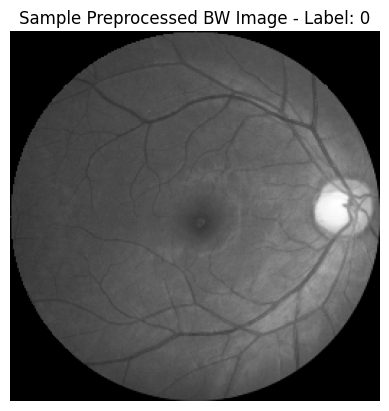

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_and_preprocess_images(data_dir, img_size=(256, 256)):
    """
    Load and preprocess fundus images from the specified directory.

    Steps in preprocessing:
    - Cutting the black border: The black background of the fundus image does not add any useful information, so it is omitted.
    - Removing the black corners: Black corners around the circular fundus image are masked out.
    - Resizing: Each image is resized to a standard 256x256 pixels.
    - Converting to grayscale (black and white): The color images are converted to grayscale.

    Parameters:
    - data_dir (str): Path to the directory containing the dataset images, organized in subfolders by label.
    - img_size (tuple): Target size for resizing images (default is 256x256).

    Returns:
    - images (np.array): Preprocessed images in numpy array format.
    - labels (np.array): Corresponding labels for the images.
    """
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            label = int(category)
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                image = cv2.imread(img_path)

                if image is not None:
                    # Resize image to the target size
                    image = cv2.resize(image, img_size)

                    # Convert image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Get height and width of the resized image
                    height, width = image.shape

                    # Create a circular mask to remove black corners around the fundus
                    mask = np.zeros((height, width), dtype=np.uint8)
                    center = (width // 2, height // 2)
                    radius = min(center[0], center[1], width - center[0], height - center[1])

                    # Draw a filled circle on the mask to match the circular fundus shape
                    cv2.circle(mask, center, radius, 255, -1)

                    # Apply mask to keep only the circular region
                    image = cv2.bitwise_and(image, image, mask=mask)

                    # Normalize the grayscale image
                    image = image / 255.0

                    # Append the processed image and label
                    images.append(image)
                    labels.append(label)

                    # Display the first preprocessed image as a sample
                    if len(images) == 1:
                        plt.imshow(image, cmap='gray')
                        plt.title(f"Sample Preprocessed BW Image - Label: {label}")
                        plt.axis('off')
                        plt.show()

    return np.array(images), np.array(labels)

# Example usage
data_dir = "/content/Retina_Images"  # Replace with your data directory path
images, labels = load_and_preprocess_images(data_dir)


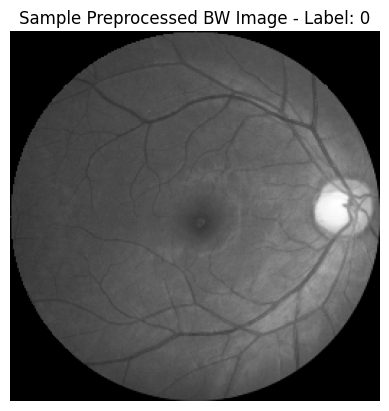

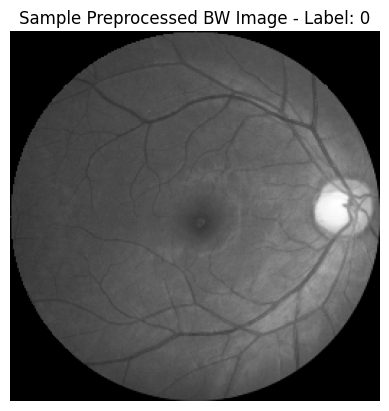

New class distribution: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 256, 256)

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load and preprocess images
import os
import numpy as np
import cv2

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_and_preprocess_images(data_dir, img_size=(256, 256)):
    """
    Load and preprocess fundus images from the specified directory.

    Steps in preprocessing:
    - Cutting the black border: The black background of the fundus image does not add any useful information, so it is omitted.
    - Removing the black corners: Black corners around the circular fundus image are masked out.
    - Resizing: Each image is resized to a standard 256x256 pixels.
    - Converting to grayscale (black and white): The color images are converted to grayscale.

    Parameters:
    - data_dir (str): Path to the directory containing the dataset images, organized in subfolders by label.
    - img_size (tuple): Target size for resizing images (default is 256x256).

    Returns:
    - images (np.array): Preprocessed images in numpy array format.
    - labels (np.array): Corresponding labels for the images.
    """
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            label = int(category)
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                image = cv2.imread(img_path)

                if image is not None:
                    # Resize image to the target size
                    image = cv2.resize(image, img_size)

                    # Convert image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Get height and width of the resized image
                    height, width = image.shape

                    # Create a circular mask to remove black corners around the fundus
                    mask = np.zeros((height, width), dtype=np.uint8)
                    center = (width // 2, height // 2)
                    radius = min(center[0], center[1], width - center[0], height - center[1])

                    # Draw a filled circle on the mask to match the circular fundus shape
                    cv2.circle(mask, center, radius, 255, -1)

                    # Apply mask to keep only the circular region
                    image = cv2.bitwise_and(image, image, mask=mask)

                    # Normalize the grayscale image
                    image = image / 255.0

                    # Append the processed image and label
                    images.append(image)
                    labels.append(label)

                    # Display the first preprocessed image as a sample
                    if len(images) == 1:
                        plt.imshow(image, cmap='gray')
                        plt.title(f"Sample Preprocessed BW Image - Label: {label}")
                        plt.axis('off')
                        plt.show()

    return np.array(images), np.array(labels)

# Example usage
data_dir = "/content/Retina_Images"  # Replace with your data directory path
images, labels = load_and_preprocess_images(data_dir)

# Load dataset
data_dir = "/content/Retina_Images"  # Update with your data path
X, y = load_and_preprocess_images(data_dir)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define CNN model with L2 Regularization
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define VGG16 model with L2 Regularization
def create_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define ResNet50 model with L2 Regularization
def create_resnet50_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define EfficientNetB0 model with L2 Regularization
def create_efficientnet_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Apply oversampling
def apply_oversampling(X, y):
    classes, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
    max_count = max(counts)
    X_balanced, y_balanced = [], []
    for cls in classes:
        X_class = X[np.argmax(y, axis=1) == cls]
        y_class = y[np.argmax(y, axis=1) == cls]
        if len(X_class) < max_count:
            X_resampled, y_resampled = resample(X_class, y_class, replace=True, n_samples=max_count, random_state=42)
            X_balanced.append(X_resampled)
            y_balanced.append(y_resampled)
        else:
            X_balanced.append(X_class)
            y_balanced.append(y_class)
    return np.vstack(X_balanced), np.vstack(y_balanced)

# Apply undersampling
def apply_undersampling(X, y):
    classes, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
    min_count = min(counts)
    X_balanced, y_balanced = [], []
    for cls in classes:
        X_class = X[np.argmax(y, axis=1) == cls]
        y_class = y[np.argmax(y, axis=1) == cls]
        X_resampled, y_resampled = resample(X_class, y_class, replace=False, n_samples=min_count, random_state=42)
        X_balanced.append(X_resampled)
        y_balanced.append(y_resampled)
    return np.vstack(X_balanced), np.vstack(y_balanced)

import numpy as np
from sklearn.utils import resample

def balanced_resampling(X, y, target_count=1000):
    """
    Resample each class in the dataset to a target count. Classes below the target count
    are oversampled, and classes above the target count are undersampled.

    Parameters:
    - X (np.array): Feature data.
    - y (np.array): Labels for the data (one-hot encoded).
    - target_count (int): Desired count for each class after resampling.

    Returns:
    - X_balanced (np.array): Resampled feature data.
    - y_balanced (np.array): Resampled labels.
    """
    X_balanced, y_balanced = [], []
    y_classes = np.argmax(y, axis=1)  # Convert one-hot labels to single label values

    for cls in np.unique(y_classes):
        # Select samples of the current class
        X_class = X[y_classes == cls]
        y_class = y[y_classes == cls]

        # Resample the class to match the target count
        X_resampled, y_resampled = resample(
            X_class, y_class,
            replace=len(X_class) < target_count,  # Oversample if under target count
            n_samples=target_count,
            random_state=42
        )

        # Collect resampled data
        X_balanced.append(X_resampled)
        y_balanced.append(y_resampled)

    # Concatenate balanced data and labels
    return np.vstack(X_balanced), np.vstack(y_balanced)

# Example usage
# X and y should already be defined and y should be one-hot encoded
target_count = 1000
X_balanced, y_balanced = balanced_resampling(X, y, target_count)

# Verify the new class distribution
new_class_counts = np.unique(np.argmax(y_balanced, axis=1), return_counts=True)
print("New class distribution:", dict(zip(new_class_counts[0], new_class_counts[1])))


# Apply SMOTE
def apply_smote(X, y):
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X.reshape(X.shape[0], -1), np.argmax(y, axis=1))
    return X_resampled.reshape(-1, *X.shape[1:]), to_categorical(y_resampled, num_classes)

# Compute class weights
def compute_weights(y):
    class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y, axis=1)), y=np.argmax(y, axis=1))
    return {i: class_weights[i] for i in range(len(class_weights))}

# Data augmentation generator
def create_data_augmentation():
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Evaluate model performance
def evaluate_model_performance(model, X_val, y_val, num_classes):
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:", cm)
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-Score (Macro):", f1)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    print("Quadratic Weighted Kappa (QWK):", qwk)
    y_val_roc = to_categorical(y_true, num_classes=num_classes)
    auc_scores = []
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_val_roc[:, i], y_pred_probs[:, i])
        auc_score = auc(fpr, tpr)
        auc_scores.append(auc_score)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend(loc='best')
    plt.show()
    print("AUC-ROC Scores per Class:", auc_scores)
    return f1

# Track best model
best_model = None
best_score = 0
best_model_type = ""
best_technique = ""

# Train and evaluate models
model_types = ["cnn", "vgg16", "resnet50", "efficientnet"]

# techniques = ["class_weights", "oversampling", "undersampling", "data_augmentation", "smote"]
techniques = ["balanced"]

for model_type in model_types:
    for technique in techniques:
        if model_type == "cnn":
            model = create_cnn_model(X_train.shape[1:], num_classes)
        elif model_type == "vgg16":
            model = create_vgg16_model(X_train.shape[1:], num_classes)
        elif model_type == "resnet50":
            model = create_resnet50_model(X_train.shape[1:], num_classes)
        elif model_type == "efficientnet":
            model = create_efficientnet_model(X_train.shape[1:], num_classes)

        # Apply technique
        if technique == "balanced":
            X_train_balanced, y_train_balanced = balanced_resampling(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "class_weights":
            class_weights = compute_weights(y_train)
            model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=class_weights, callbacks=[early_stopping])

        elif technique == "oversampling":
            X_train_balanced, y_train_balanced = apply_oversampling(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "undersampling":
            X_train_balanced, y_train_balanced = apply_undersampling(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "smote":
            X_train_balanced, y_train_balanced = apply_smote(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "data_augmentation":
            datagen = create_data_augmentation()
            model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10, callbacks=[early_stopping])

        # Save model and evaluate performance
        model.save(f"{model_type}_{technique}_model.h5")
        print(f"Saved model: {model_type} with technique: {technique}")

        # Evaluate current model on validation set
        f1_score_val = evaluate_model_performance(model, X_val, y_val, num_classes)

        # Track the best model
        if f1_score_val > best_score:
            best_score = f1_score_val
            best_model = model
            best_model_type = model_type
            best_technique = technique

# Print and evaluate best model
print(f"\nBest Model Type: {best_model_type}, Technique: {best_technique}, with F1 Score: {best_score:.4f}")
print("\nEvaluating best model on validation set:")
evaluate_model_performance(best_model, X_val, y_val, num_classes)


PART2


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load and preprocess images
def load_and_preprocess_images(data_dir, img_size=(224, 224)):
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            label = int(category)
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                image = cv2.imread(img_path)
                if image is not None:
                    image = cv2.resize(image, img_size)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load dataset
data_dir = "/content/Retina_Images"  # Update with your data path
X, y = load_and_preprocess_images(data_dir)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val

NameError: name 'X_train' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define CNN model with adjustable dense units and dropout
def create_cnn_model(input_shape, num_classes, dense_units=128, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Function to apply oversampling to balance the classes
def apply_oversampling(X, y):
    classes, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
    max_count = max(counts)
    X_balanced, y_balanced = [], []
    for cls in classes:
        X_class = X[np.argmax(y, axis=1) == cls]
        y_class = y[np.argmax(y, axis=1) == cls]
        if len(X_class) < max_count:
            X_resampled, y_resampled = resample(X_class, y_class, replace=True, n_samples=max_count, random_state=42)
            X_balanced.append(X_resampled)
            y_balanced.append(y_resampled)
        else:
            X_balanced.append(X_class)
            y_balanced.append(y_class)
    return np.vstack(X_balanced), np.vstack(y_balanced)

# Evaluate model performance with additional metrics
def evaluate_model_performance(model, X_val, y_val, num_classes):
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # F1 Score
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-Score (Macro):", f1)

    # Quadratic Weighted Kappa
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    print("Quadratic Weighted Kappa (QWK):", qwk)

    # AUC-ROC Scores for each class
    y_val_roc = to_categorical(y_true, num_classes=num_classes)
    auc_scores = []
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_val_roc[:, i], y_pred_probs[:, i])
        auc_score = auc(fpr, tpr)
        auc_scores.append(auc_score)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend(loc='best')
    plt.show()

    print("AUC-ROC Scores per Class:", auc_scores)
    return f1, qwk, auc_scores

# Hyperparameter tuning function for CNN with oversampling
def hyperparameter_tuning_with_oversampling(X_train, y_train, X_val, y_val):
    param_grid = {
        'learning_rates': [1e-4, 1e-3],
        'dense_units': [128, 256],
        'dropout_rates': [0.3, 0.5],
        'epochs': 10
    }

    best_score = 0
    best_params = {}
    best_model = None

    # Iterate over hyperparameter combinations
    for lr in param_grid['learning_rates']:
        for units in param_grid['dense_units']:
            for dropout in param_grid['dropout_rates']:
                print(f"Training CNN model with learning_rate={lr}, dense_units={units}, dropout_rate={dropout}")

                # Apply oversampling to the training data
                X_train_balanced, y_train_balanced = apply_oversampling(X_train, y_train)

                # Create and compile the CNN model
                model = create_cnn_model(X_train.shape[1:], y_train.shape[1], dense_units=units, dropout_rate=dropout)
                model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

                # Train the model with early stopping
                model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val),
                          epochs=param_grid['epochs'], batch_size=32, callbacks=[early_stopping], verbose=0)

                # Evaluate the model
                f1, qwk, auc_scores = evaluate_model_performance(model, X_val, y_val, y_train.shape[1])
                score = np.mean(auc_scores)  # Use average AUC-ROC as the scoring metric

                # Track the best model based on average AUC-ROC
                if score > best_score:
                    best_score = score
                    best_params = {'learning_rate': lr, 'dense_units': units, 'dropout_rate': dropout}
                    best_model = model

    # Display the best parameters and save the best model
    print(f"Best parameters: {best_params} with average AUC-ROC: {best_score:.4f}")
    best_model.save("best_cnn_oversampling_model.h5")
    print("Best model saved as 'best_cnn_oversampling_model.h5'")

# Example usage
hyperparameter_tuning_with_oversampling(X_train, y_train, X_val, y_val)


NameError: name 'X_train' is not defined

In [ ]:
# from tensorflow.keras.applications import ResNet50, EfficientNetB0

# # Step 4: Define ResNet50 Model with Transfer Learning
# def create_resnet50_model(input_shape, num_classes):
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
#     for layer in base_model.layers:
#         layer.trainable = False
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Step 5: Define EfficientNetB0 Model with Transfer Learning
# def create_efficientnet_model(input_shape, num_classes):
#     base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
#     for layer in base_model.layers:
#         layer.trainable = False
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# # Train ResNet50 Model
# resnet_model = create_resnet50_model(X_train.shape[1:], num_classes)
# resnet_model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=current_class_weights)
# resnet_model.save(f"resnet50_model_{technique}.h5")
# print(f"ResNet50 Model with {technique} saved as resnet50_model_{technique}.h5")

# # Train EfficientNetB0 Model
# efficientnet_model = create_efficientnet_model(X_train.shape[1:], num_classes)
# efficientnet_model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=current_class_weights)
# efficientnet_model.save(f"efficientnet_model_{technique}.h5")
# print(f"EfficientNetB0 Model with {technique} saved as efficientnet_model_{technique}.h5")


In [ ]:
# # Import necessary libraries
# import os
# import numpy as np
# import cv2
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score, f1_score

# # Load and preprocess images
# def load_and_preprocess_images(data_dir, img_size=(224, 224)):
#     images, labels = [], []
#     for category in os.listdir(data_dir):
#         category_path = os.path.join(data_dir, category)
#         if os.path.isdir(category_path):
#             label = int(category)
#             for img_file in os.listdir(category_path):
#                 img_path = os.path.join(category_path, img_file)
#                 image = cv2.imread(img_path)
#                 if image is not None:
#                     image = cv2.resize(image, img_size)
#                     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize
#                     images.append(image)
#                     labels.append(label)
#     return np.array(images), np.array(labels)

# # Dataset loading
# data_dir = "/content/Retina_Images"  # Update with your data path
# X, y = load_and_preprocess_images(data_dir)
# num_classes = len(np.unique(y))
# y = to_categorical(y, num_classes=num_classes)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Data augmentation
# data_augmentation = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# train_generator = data_augmentation.flow(X_train, y_train, batch_size=32)

# # Define CNN and VGG16 models
# def create_cnn_model(learning_rate, dense_units, dropout_rate):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Flatten(),
#         Dense(dense_units, activation='relu'),
#         Dropout(dropout_rate),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# def create_vgg16_model(learning_rate, dense_units, dropout_rate):
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#     for layer in base_model.layers:
#         layer.trainable = False

#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(dense_units, activation='relu')(x)
#     x = Dropout(dropout_rate)(x)
#     predictions = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=predictions)
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Define parameter grids for manual tuning
# learning_rates = [1e-4, 1e-3]
# dense_units = [128, 256]
# dropout_rates = [0.3, 0.5]
# epochs = 5  # Adjust as needed for more trials

# # Initialize variables to store the best model and score
# best_cnn_model, best_vgg_model = None, None
# best_cnn_score, best_vgg_score = 0, 0
# best_cnn_params, best_vgg_params = {}, {}

# # Loop through each combination of hyperparameters
# for lr in learning_rates:
#     for units in dense_units:
#         for dropout in dropout_rates:
#             print(f"Training CNN model with learning_rate={lr}, dense_units={units}, dropout_rate={dropout}")
#             cnn_model = create_cnn_model(learning_rate=lr, dense_units=units, dropout_rate=dropout)
#             cnn_model.fit(train_generator, validation_data=(X_val, y_val), epochs=epochs, batch_size=32)

#             # Evaluate CNN model
#             cnn_score = cnn_model.evaluate(X_val, y_val, verbose=0)[1]
#             if cnn_score > best_cnn_score:
#                 best_cnn_score = cnn_score
#                 best_cnn_model = cnn_model
#                 best_cnn_params = {'learning_rate': lr, 'dense_units': units, 'dropout_rate': dropout}

#             print(f"Training VGG16 model with learning_rate={lr}, dense_units={units}, dropout_rate={dropout}")
#             vgg_model = create_vgg16_model(learning_rate=lr, dense_units=units, dropout_rate=dropout)
#             vgg_model.fit(train_generator, validation_data=(X_val, y_val), epochs=epochs, batch_size=32)

#             # Evaluate VGG16 model
#             vgg_score = vgg_model.evaluate(X_val, y_val, verbose=0)[1]
#             if vgg_score > best_vgg_score:
#                 best_vgg_score = vgg_score
#                 best_vgg_model = vgg_model
#                 best_vgg_params = {'learning_rate': lr, 'dense_units': units, 'dropout_rate': dropout}

# # Print the best parameters and scores
# print("Best CNN Model Params:", best_cnn_params, "with accuracy:", best_cnn_score)
# print("Best VGG16 Model Params:", best_vgg_params, "with accuracy:", best_vgg_score)

# # Evaluation Function
# def evaluate_model(model, X_val, y_val):
#     y_pred_probs = model.predict(X_val)
#     y_pred = np.argmax(y_pred_probs, axis=1)
#     y_true = np.argmax(y_val, axis=1)

#     # Confusion Matrix
#     cm = confusion_matrix(y_true, y_pred)
#     print("Confusion Matrix:\n", cm)

#     # Classification Report
#     report = classification_report(y_true, y_pred)
#     print("Classification Report:\n", report)

#     # F1 Score
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     print("F1 Score:", f1)

#     # AUC-ROC Score
#     roc_auc = roc_auc_score(y_val, y_pred_probs, multi_class='ovr')
#     print("AUC-ROC Score:", roc_auc)

#     # Quadratic Weighted Kappa
#     qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
#     print("Quadratic Weighted Kappa:", qwk)

# # Evaluate best CNN Model
# print("=== Evaluation for Best CNN Model ===")
# evaluate_model(best_cnn_model, X_val, y_val)

# # Evaluate best VGG16 Model
# print("=== Evaluation for Best VGG16 Model ===")
# evaluate_model(best_vgg_model, X_val, y_val)


Training CNN model with learning_rate=0.0001, dense_units=128, dropout_rate=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 6/92 ━━━━━━━━━━━━━━━━━━━━ 6:07 4s/step - accuracy: 0.3728 - loss: 1.4827

Using the basic resnet50 and efficientnet50 to train the 5 variation for each.

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the data folder in Google Drive
drive_data_path = '/content/drive/My Drive/Data/'

# List contents of the Data folder to confirm the files are available
print("Contents of the Data folder:", os.listdir(drive_data_path))

# Define paths to training and testing data ZIP files
training_data_path = os.path.join(drive_data_path, 'Copy of resized train 19.zip')
testing_data_path = os.path.join(drive_data_path, 'Copy of resized train 19.zip')

# Print file paths for confirmation
print("Training Data Path:", training_data_path)
print("Testing Data Path:", testing_data_path)

In [ ]:
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

# Function to read and display images from a specified ZIP file
def read_images_from_zip(zip_path):
    with zipfile.ZipFile(zip_path) as zip_file:
        # Loop through files in the ZIP archive
        for file_name in zip_file.namelist():
            # Filter for image files
            if file_name.endswith(('jpg', 'jpeg', 'png', 'gif')):
                # Open and display each image file
                with zip_file.open(file_name) as image_file:
                    image = Image.open(image_file)
                    plt.imshow(image)
                    plt.axis('off')
                    plt.title(file_name)
                    plt.show()
                break  # Display only the first image for brevity

# Display images from training and testing data
read_images_from_zip(training_data_path)
read_images_from_zip(testing_data_path)

In [ ]:
import pandas as pd
import zipfile
import shutil

# Paths to ZIP and CSV files and output directory for images
zip_file_path = '/content/drive/MyDrive/Data/Copy of resized train 19.zip'
csv_file_path = '/content/drive/MyDrive/Data/train.csv'
output_dir = 'Retina_Images'

# Step 1: Extract images from ZIP file to output directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Step 2: Load CSV file with image labels
data = pd.read_csv(csv_file_path)
data['diagnosis'] = data['diagnosis'].astype(str)  # Ensure labels are strings

# Step 3: Create folders for each diagnosis category if they don't exist
categories = data['diagnosis'].unique()
for category in categories:
    category_path = os.path.join(output_dir, category)
    os.makedirs(category_path, exist_ok=True)

# Step 4: Move images into their respective category folders
for _, row in data.iterrows():
    image_name = row['id_code'] + '.jpg'
    label = row['diagnosis']
    source_path = os.path.join(output_dir, image_name)
    target_path = os.path.join(output_dir, label, image_name)

    # Move image to the category folder
    if os.path.exists(source_path):
        shutil.move(source_path, target_path)
    else:
        print(f"Image {image_name} not found!")

print("Images have been organized by category.")

In [ ]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

# Import required libraries for data processing and model building
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# Function to load and preprocess images from category folders
def load_and_preprocess_images(data_dir, img_size=(224, 224)):
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            label = int(category)  # Convert category name to integer label
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                image = cv2.imread(img_path)
                if image is not None:
                    image = cv2.resize(image, img_size)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load dataset
data_dir = "/content/Retina_Images"
X, y = load_and_preprocess_images(data_dir)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define CNN model with L2 Regularization
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define VGG16 model with L2 Regularization
def create_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define ResNet50 model with L2 Regularization
def create_resnet50_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define EfficientNetB0 model with L2 Regularization
def create_efficientnet_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Apply oversampling
def apply_oversampling(X, y):
    classes, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
    max_count = max(counts)
    X_balanced, y_balanced = [], []
    for cls in classes:
        X_class = X[np.argmax(y, axis=1) == cls]
        y_class = y[np.argmax(y, axis=1) == cls]
        if len(X_class) < max_count:
            X_resampled, y_resampled = resample(X_class, y_class, replace=True, n_samples=max_count, random_state=42)
            X_balanced.append(X_resampled)
            y_balanced.append(y_resampled)
        else:
            X_balanced.append(X_class)
            y_balanced.append(y_class)
    return np.vstack(X_balanced), np.vstack(y_balanced)

# Apply undersampling
def apply_undersampling(X, y):
    classes, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
    min_count = min(counts)
    X_balanced, y_balanced = [], []
    for cls in classes:
        X_class = X[np.argmax(y, axis=1) == cls]
        y_class = y[np.argmax(y, axis=1) == cls]
        X_resampled, y_resampled = resample(X_class, y_class, replace=False, n_samples=min_count, random_state=42)
        X_balanced.append(X_resampled)
        y_balanced.append(y_resampled)
    return np.vstack(X_balanced), np.vstack(y_balanced)

# Apply SMOTE
def apply_smote(X, y):
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X.reshape(X.shape[0], -1), np.argmax(y, axis=1))
    return X_resampled.reshape(-1, *X.shape[1:]), to_categorical(y_resampled, num_classes)

# Compute class weights
def compute_weights(y):
    class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y, axis=1)), y=np.argmax(y, axis=1))
    return {i: class_weights[i] for i in range(len(class_weights))}

# Data augmentation generator
def create_data_augmentation():
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Evaluate model performance
def evaluate_model_performance(model, X_val, y_val, num_classes):
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:", cm)
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-Score (Macro):", f1)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    print("Quadratic Weighted Kappa (QWK):", qwk)
    y_val_roc = to_categorical(y_true, num_classes=num_classes)
    auc_scores = []
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_val_roc[:, i], y_pred_probs[:, i])
        auc_score = auc(fpr, tpr)
        auc_scores.append(auc_score)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend(loc='best')
    plt.show()
    print("AUC-ROC Scores per Class:", auc_scores)
    return f1

# Track best model
best_model = None
best_score = 0
best_model_type = ""
best_technique = ""

# Train and evaluate models
model_types = ["cnn", "vgg16", "resnet50", "efficientnet"]

techniques = ["class_weights", "oversampling", "undersampling", "data_augmentation", "smote"]

for model_type in model_types:
    for technique in techniques:
        if model_type == "cnn":
            model = create_cnn_model(X_train.shape[1:], num_classes)
        elif model_type == "vgg16":
            model = create_vgg16_model(X_train.shape[1:], num_classes)
        elif model_type == "resnet50":
            model = create_resnet50_model(X_train.shape[1:], num_classes)
        elif model_type == "efficientnet":
            model = create_efficientnet_model(X_train.shape[1:], num_classes)

        # Apply technique
        if technique == "class_weights":
            class_weights = compute_weights(y_train)
            model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=class_weights, callbacks=[early_stopping])

        elif technique == "oversampling":
            X_train_balanced, y_train_balanced = apply_oversampling(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "undersampling":
            X_train_balanced, y_train_balanced = apply_undersampling(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "smote":
            X_train_balanced, y_train_balanced = apply_smote(X_train, y_train)
            model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

        elif technique == "data_augmentation":
            datagen = create_data_augmentation()
            model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10, callbacks=[early_stopping])

        # Save model and evaluate performance
        model.save(f"{model_type}_{technique}_model.h5")
        print(f"Saved model: {model_type} with technique: {technique}")

        # Evaluate current model on validation set
        f1_score_val = evaluate_model_performance(model, X_val, y_val, num_classes)

        # Track the best model
        if f1_score_val > best_score:
            best_score = f1_score_val
            best_model = model
            best_model_type = model_type
            best_technique = technique

# Print and evaluate best model
print(f"\nBest Model Type: {best_model_type}, Technique: {best_technique}, with F1 Score: {best_score:.4f}")
print("\nEvaluating best model on validation set:")
evaluate_model_performance(best_model, X_val, y_val, num_classes)
